# Analyse des modèles

In [42]:
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import des données

In [ ]:
data = pd.read_parquet('./params/params.parquet')
data["n_filt"] = data["n_filt"].fillna(0)
data["n_filt"] = pd.to_numeric(data["n_filt"], errors="coerce").fillna(0).astype(int)

In [44]:
features = [
    "batch_size", "lr", "n_hid", "drop_prob","n_filt",
    "seq_len", "n_feat", "n_class"
]
X = data[features]
X_scaled = StandardScaler().fit_transform(X)

Definit le reducer par UMAP

In [45]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.8, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/home/owen/.local/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Plot la figure

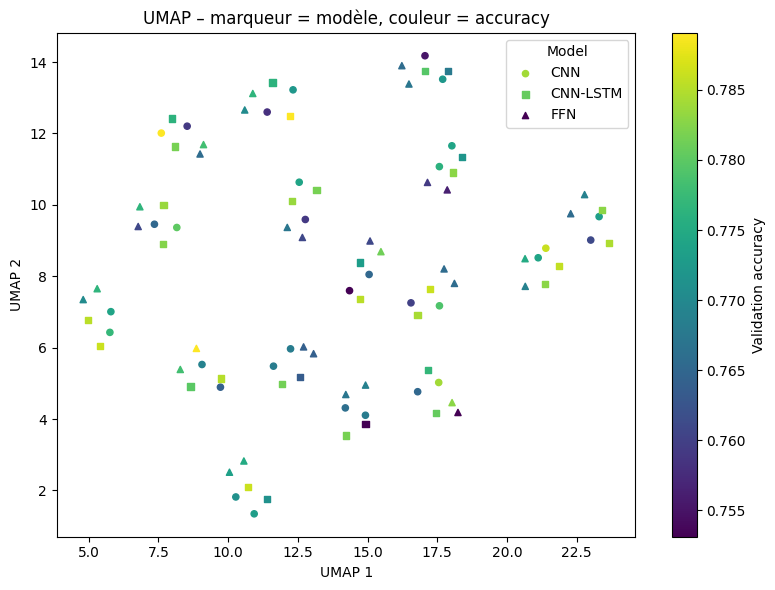

In [66]:
models = data["model_name"].astype(str).values
unique_models = np.unique(models)
markers = ["o", "s", "^", "D"]
plt.figure(figsize=(8, 6))

for i, m in enumerate(unique_models):
    idx = (models == m)
    plt.scatter(
        X_umap[idx, 0],
        X_umap[idx, 1],
        c=data.loc[idx, "val_acc"],
        cmap="viridis",
        marker=markers[i % len(markers)],
        s=20,
        label=m
    )

plt.title("UMAP – marqueur = modèle, couleur = accuracy")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Validation accuracy")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


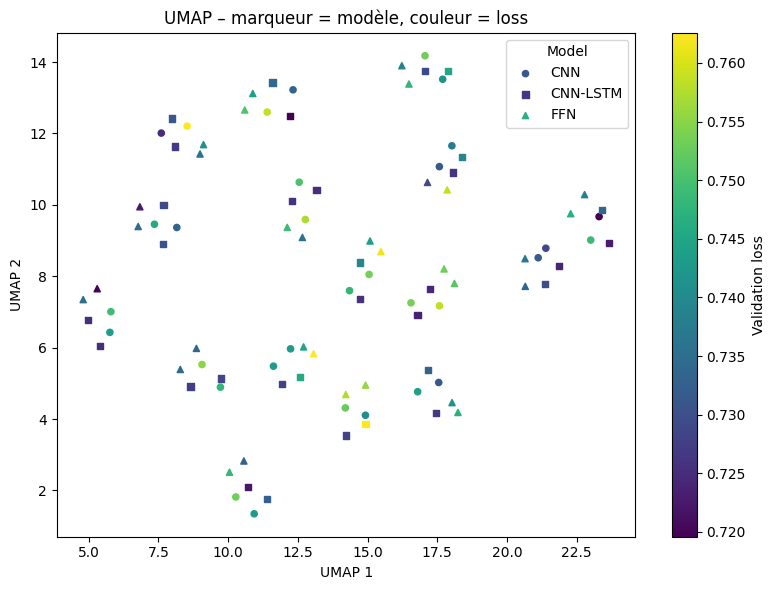

In [67]:
plt.figure(figsize=(8, 6))
for i, m in enumerate(unique_models):
    idx = (models == m)
    plt.scatter(
        X_umap[idx, 0],
        X_umap[idx, 1],
        c=data.loc[idx, "val_loss"],
        cmap="viridis",
        marker=markers[i % len(markers)],
        s=20,
        label=m
    )

plt.title("UMAP – marqueur = modèle, couleur = loss")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Validation loss")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

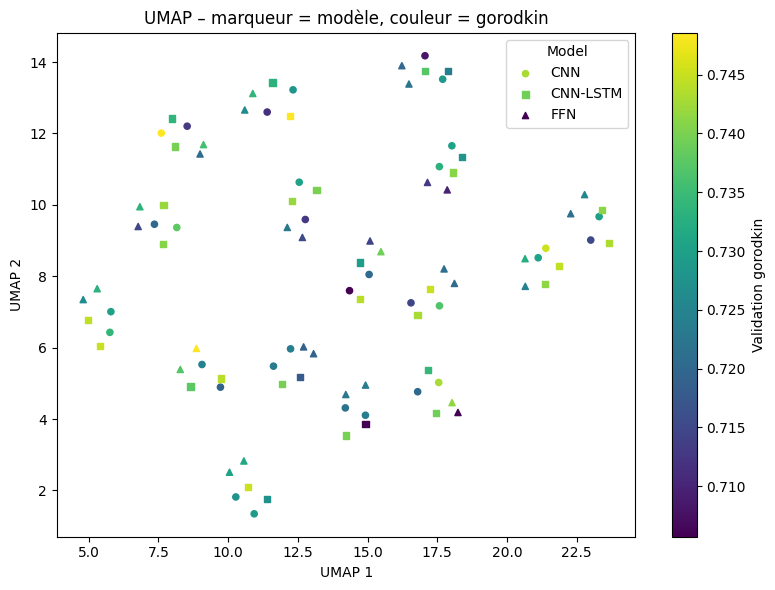

In [68]:
plt.figure(figsize=(8, 6))
for i, m in enumerate(unique_models):
    idx = (models == m)
    plt.scatter(
        X_umap[idx, 0],
        X_umap[idx, 1],
        c=data.loc[idx, "gorodkin_val"],
        cmap="viridis",
        marker=markers[i % len(markers)],
        s=20,
        label=m
    )

plt.title("UMAP – marqueur = modèle, couleur = gorodkin")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Validation gorodkin")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

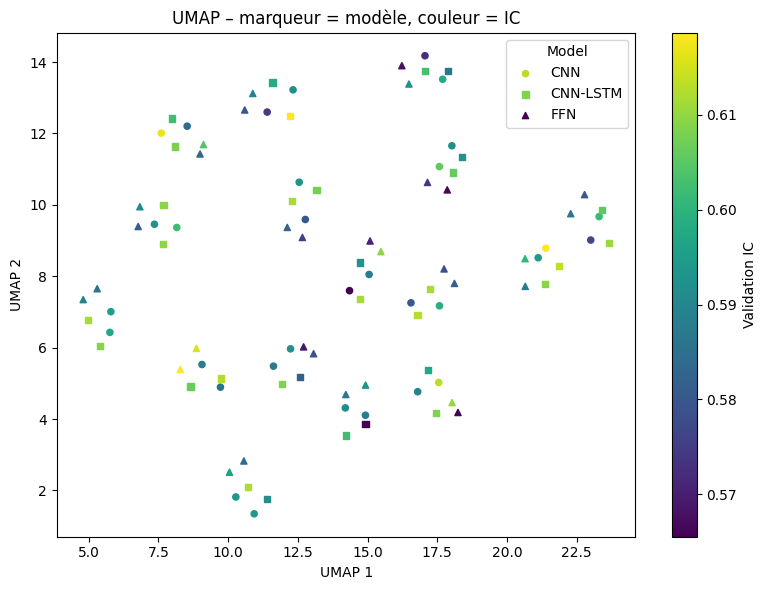

In [69]:
plt.figure(figsize=(8, 6))
for i, m in enumerate(unique_models):
    idx = (models == m)
    plt.scatter(
        X_umap[idx, 0],
        X_umap[idx, 1],
        c=data.loc[idx, "IC_val"],
        cmap="viridis",
        marker=markers[i % len(markers)],
        s=20,
        label=m
    )

plt.title("UMAP – marqueur = modèle, couleur = IC")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Validation IC")
plt.legend(title="Model")
plt.tight_layout()
plt.show()